In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# img[:, :, ::-1]

- Harris 또는 Shi-Tomasi corner 검출은 회전된 이미지에 대해서도 충분히 검출을 해내지만 이미지를 확대하면 코너를 제대로 검출하지 못한다.
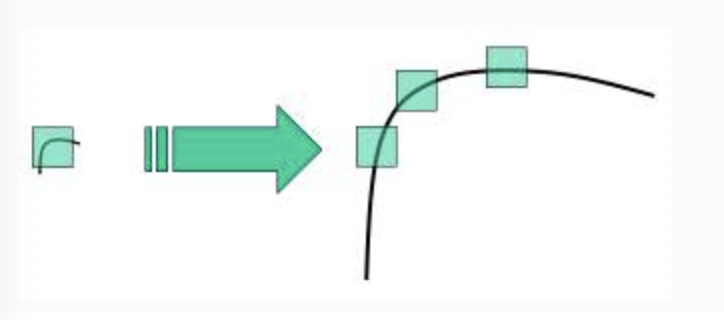


- SIFT 알고리즘은 이미지에서 스케일 불변인 키포인트를 추출하고 추출한 키포인트들의 descriptor를 계산한다.

### 1. Scale-space Extrema Detection(스케일 - 공간 극값 검출)
##### 절차
1. Scale-space extrema detection (스케일 - 공간 극값 검출)
- 가우시안 필터 후 라플라시안 필터(LoG; Laplacian of Gaussian)를 적용하여 이미지에서 다양한 크기의 방울 모양의 이미지 검출
- LoG는 시간이 다소 걸려 하나의 이미지에 서로 다른 필터를 적용한 가우시안 피라미드 이미지의 차 (DoG; Difference of Gaussian)를 이용
- DoG를 찾으면 이미지에서 스케일-공간 좌표상 극값을 찾는다. 해당 극값을 Potential keypoint라 한다.
2. Keypoint localization (키포인트 지역화)
- Potential keypoint를 정제(테일러 전개 이용하여 정제)하여 keypoint 추출
3. Orientation assignment(방향 할당하기)
- 키포인트에 방향성-불변이 되도록 방향 할당
4. Keypoint descriptor
- 키포인트를 이용하여 descriptor 계산
5. Keypoint matching
- 두 개의 이미지에서 키포인트들을 매칭하여 이미지 추출 등을 실시

In [ ]:
img = cv2.imread('home.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures.SIFT_create()
kp = sift.detect(gray, None)

img = cv2.drawKeypoints(gray, kp)

cv2.imwrite('sift_keypoints.jpg', img)